In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')

In [3]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
df_2016 = df[df['year'] == 2016]

In [6]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 24864 to 33647
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       8784 non-null   int64  
 1   year     8784 non-null   int64  
 2   month    8784 non-null   int64  
 3   day      8784 non-null   int64  
 4   hour     8784 non-null   int64  
 5   PM2.5    8670 non-null   float64
 6   PM10     8688 non-null   float64
 7   SO2      8652 non-null   float64
 8   NO2      8670 non-null   float64
 9   CO       8650 non-null   float64
 10  O3       8685 non-null   float64
 11  TEMP     8777 non-null   float64
 12  PRES     8777 non-null   float64
 13  DEWP     8777 non-null   float64
 14  RAIN     8777 non-null   float64
 15  wd       8741 non-null   object 
 16  WSPM     8779 non-null   float64
 17  station  8784 non-null   object 
dtypes: float64(11), int64(5), object(2)
memory usage: 1.3+ MB


In [7]:
df_2016.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5      114
PM10        96
SO2        132
NO2        114
CO         134
O3          99
TEMP         7
PRES         7
DEWP         7
RAIN         7
wd          43
WSPM         5
station      0
dtype: int64

In [8]:
df_2016 = df_2016.dropna(subset=['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'])

Na célula acima eu estava verificando se caso eu excluísse os nulos das variáveis independentes eu iriam sobrar muitos PM2.5 nulos, caso sobrassem eu iria preencher eles posteriormente utilizando o próprio modelo de regressão linear. Mas como foram poucos acabei preferindo excluir todos os nulos mesmo.

In [9]:
df_2016.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5      12
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

In [10]:
df_2016 = df_2016.dropna(subset=['PM2.5'])

In [11]:
df_2016.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,8459.000000,8459.0,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000
mean,29237.323797,2016.0,6.488237,15.735784,11.462230,60.837451,85.564015,8.117626,45.568270,1121.941128,53.836624,13.400505,1007.930287,1.602494,0.066344,1.983237
std,2540.846591,0.0,3.458014,8.786884,6.943057,62.588812,75.334613,9.723610,29.409679,1027.588676,52.197327,11.774260,10.359994,14.279198,0.663958,1.329337
min,24865.000000,2016.0,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,2.000000,100.000000,2.000000,-16.600000,985.400000,-35.100000,0.000000,0.100000
25%,27031.500000,2016.0,3.000000,8.000000,5.000000,15.000000,31.000000,2.000000,24.000000,500.000000,13.000000,2.900000,999.200000,-10.800000,0.000000,1.100000
50%,29226.000000,2016.0,6.000000,16.000000,11.000000,40.000000,65.000000,4.000000,37.000000,800.000000,44.000000,14.375000,1007.200000,2.700000,0.000000,1.600000
75%,31450.500000,2016.0,10.000000,23.000000,18.000000,85.000000,118.000000,10.000000,61.000000,1300.000000,71.000000,23.400000,1016.100000,14.100000,0.000000,2.400000
max,33648.000000,2016.0,12.000000,31.000000,23.000000,492.000000,933.000000,119.000000,208.000000,10000.000000,327.000000,38.100000,1036.500000,26.900000,22.700000,9.400000


In [12]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8459 entries, 24864 to 33647
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       8459 non-null   int64  
 1   year     8459 non-null   int64  
 2   month    8459 non-null   int64  
 3   day      8459 non-null   int64  
 4   hour     8459 non-null   int64  
 5   PM2.5    8459 non-null   float64
 6   PM10     8459 non-null   float64
 7   SO2      8459 non-null   float64
 8   NO2      8459 non-null   float64
 9   CO       8459 non-null   float64
 10  O3       8459 non-null   float64
 11  TEMP     8459 non-null   float64
 12  PRES     8459 non-null   float64
 13  DEWP     8459 non-null   float64
 14  RAIN     8459 non-null   float64
 15  wd       8459 non-null   object 
 16  WSPM     8459 non-null   float64
 17  station  8459 non-null   object 
dtypes: float64(11), int64(5), object(2)
memory usage: 1.2+ MB


# EDA

# Mapa de calor

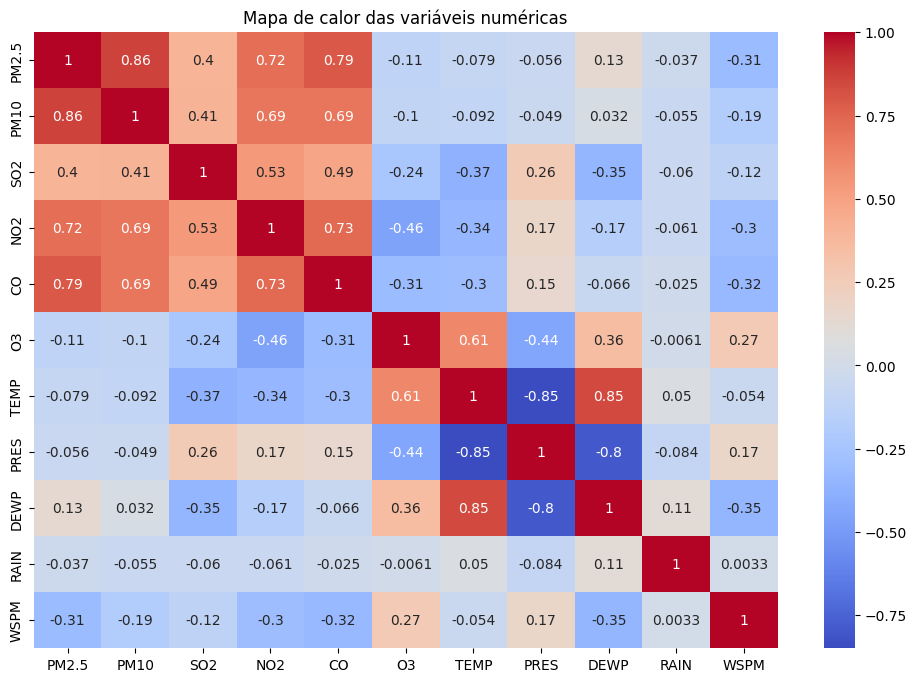

In [13]:
df_2016_num = df_2016.select_dtypes(include=['number']).drop(columns=['year', 'month', 'day', 'hour', 'No'])

plt.subplots(figsize=(12,8))
sns.heatmap(df_2016_num.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor das variáveis numéricas')
plt.show()

# Histograma

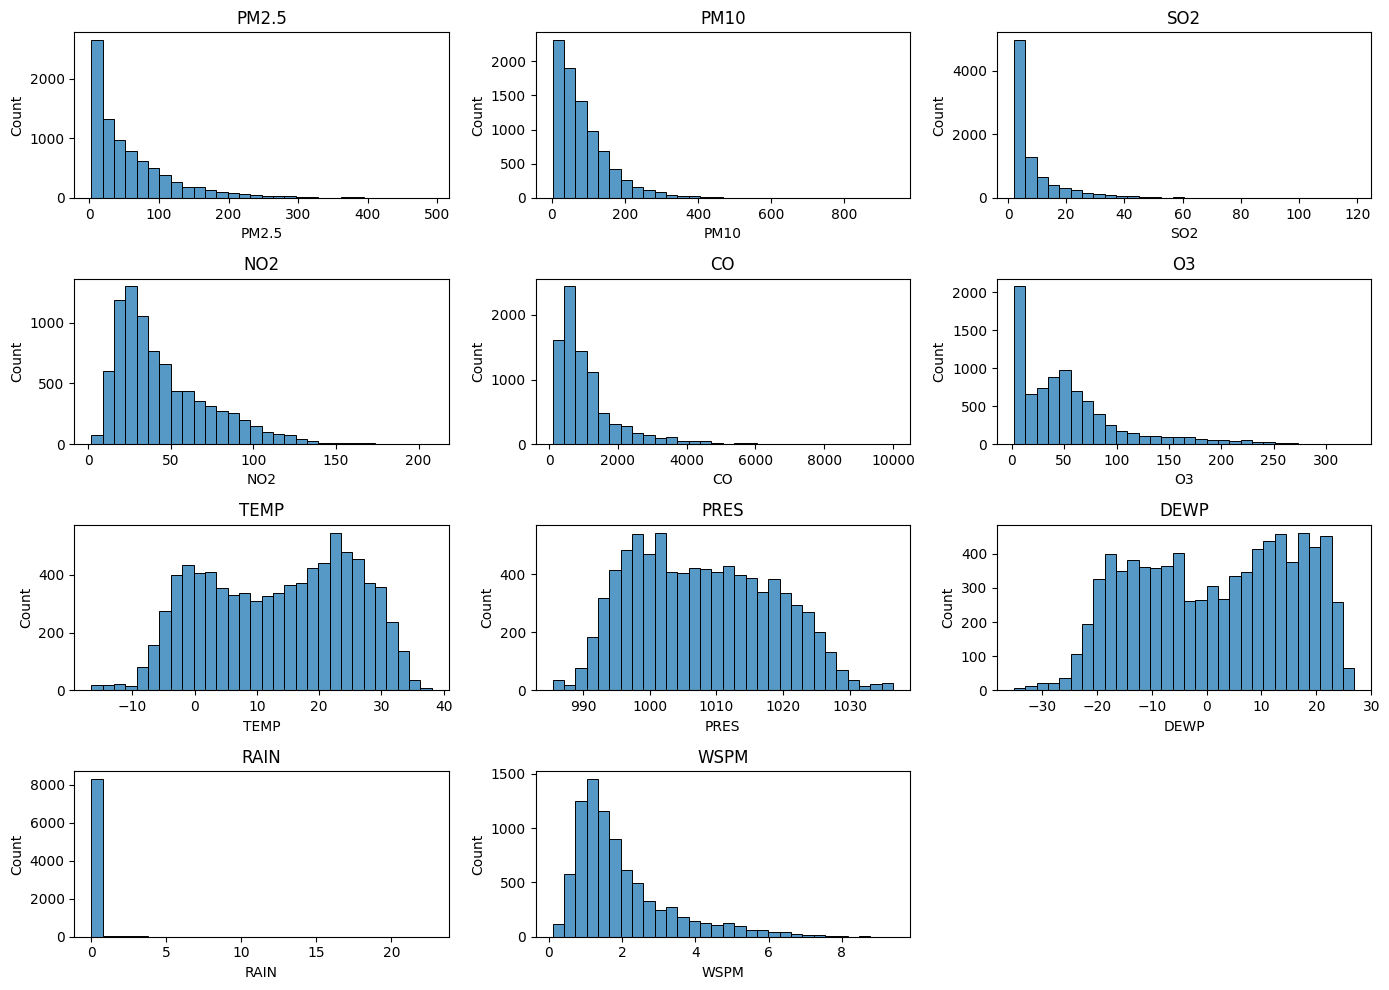

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(14,10))
ax = ax.flatten()

cols = df_2016_num.columns

for i, col in enumerate(cols):
    sns.histplot(df_2016_num[col], bins=30, kde=False, ax=ax[i])
    ax[i].set_title(col)

plt.delaxes()
plt.tight_layout()
plt.show()

# Boxplots

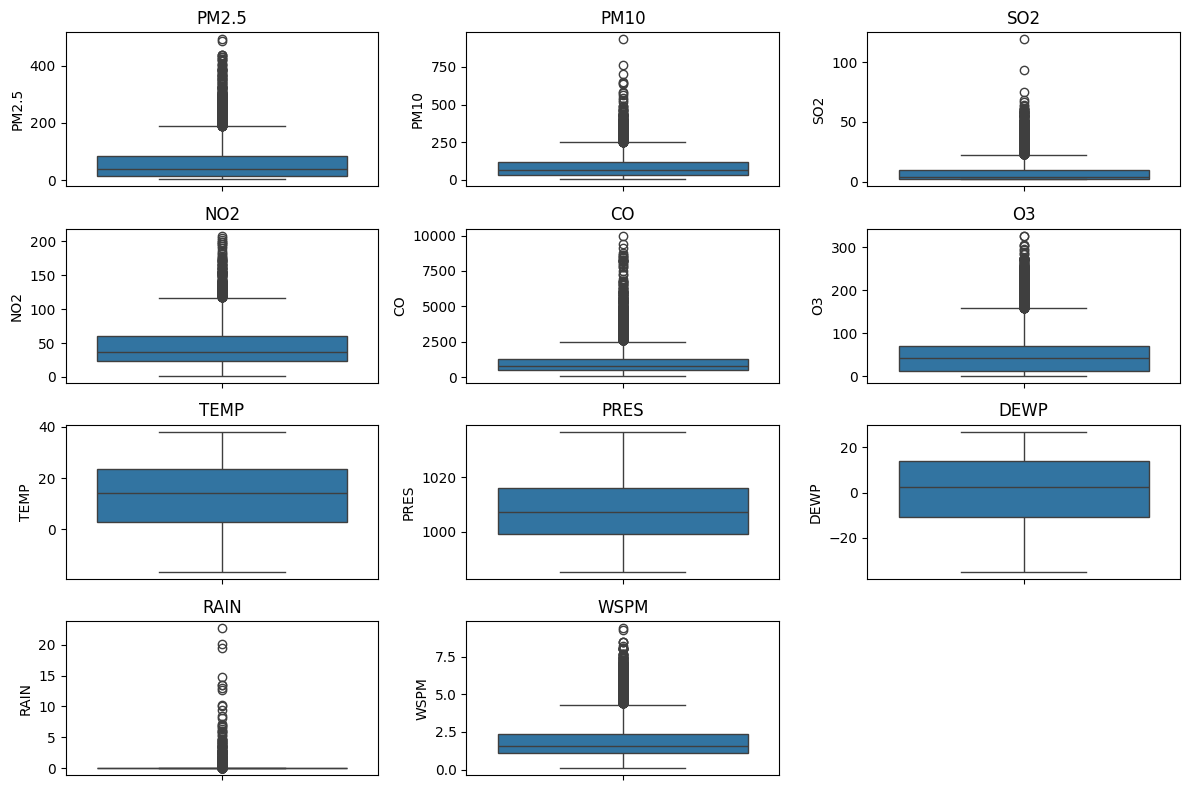

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12,8))
ax = ax.flatten()

cols = df_2016_num.columns

for i, col in enumerate(cols):
    sns.boxplot(df_2016_num[col], ax=ax[i])
    ax[i].set_title(col)

plt.delaxes()
plt.tight_layout()
plt.show()

### Transformando a variável chuva em booleana

In [16]:
df_2016['RAIN'].value_counts()

RAIN
0.0     8108
0.1       70
0.2       34
0.3       31
0.5       18
        ... 
13.0       1
19.4       1
8.5        1
2.9        1
4.1        1
Name: count, Length: 64, dtype: int64

In [17]:
df_2016['RAIN'] = (df_2016['RAIN'] > 0).astype(int)

In [18]:
df_2016['RAIN'].value_counts()

RAIN
0    8108
1     351
Name: count, dtype: int64

# Modelagem

In [19]:
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

X = df_2016[features]
y = df_2016['PM2.5']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

baseline_pred = np.full_like(y_val, y_train.mean())

print(f'R2 Baseline: {r2_score(y_val, baseline_pred)}')
print(f'MAE Baseline {mean_absolute_error(y_val, baseline_pred):.2f}')
print(f'RMSE Baseline: {root_mean_squared_error(y_val, baseline_pred):.2f}')

R2 Baseline: -0.0005021869978609761
MAE Baseline 46.00
RMSE Baseline: 62.64


### Regressão Linear Simples

In [20]:
X_train_simple = X_train[['PM10']]
X_val_simple = X_val[['PM10']]

simple_linear_regression = LinearRegression()
simple_linear_regression.fit(X_train_simple, y_train)

y_pred_simple = simple_linear_regression.predict(X_val_simple)

print(f'R2 Regressão Linear Simples: {r2_score(y_val, y_pred_simple)}')
print(f'MAE Regressão Linear Simples: {mean_absolute_error(y_val, y_pred_simple)}')
print(f'RMSE Regressão Linear Simples: {root_mean_squared_error(y_val, y_pred_simple)}')

R2 Regressão Linear Simples: 0.7782072093939109
MAE Regressão Linear Simples: 17.605481403452934
RMSE Regressão Linear Simples: 29.493929303755422


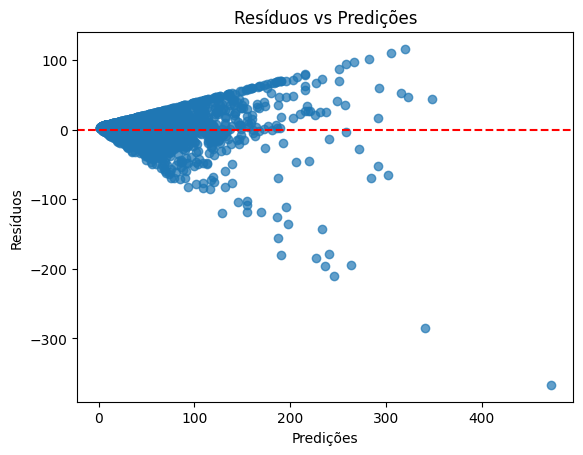

In [21]:
residuals_simple_lr = y_val - y_pred_simple

plt.scatter(y_pred_simple, residuals_simple_lr, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Predições')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.show()

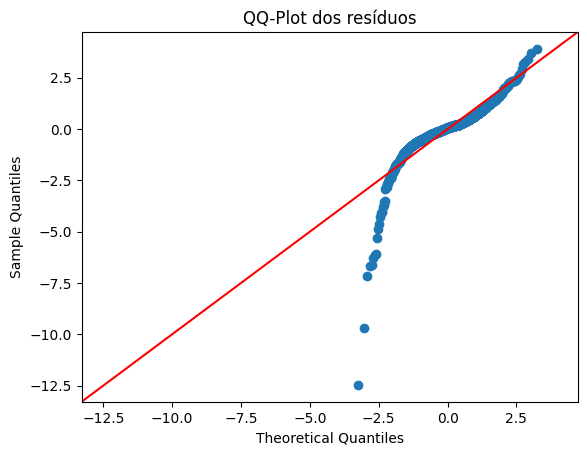

In [22]:
sm.qqplot(residuals_simple_lr, line='45', fit=True)
plt.title('QQ-Plot dos resíduos')
plt.show()

### Regressão Linear Múltipla

In [23]:
print(X_train.min())

PM10      3.0
SO2       2.0
NO2       2.0
CO      100.0
O3        2.0
TEMP    -16.6
PRES    985.5
DEWP    -35.1
RAIN      0.0
WSPM      0.1
dtype: float64


In [24]:
multi_linear_regression = LinearRegression()
multi_linear_regression.fit(X_train, y_train)

y_pred_multi = multi_linear_regression.predict(X_val)

print(f'R2 Regressão Linear Múltipla: {r2_score(y_val, y_pred_multi):.4f}')
print(f'MAE Regressão Linear Múltipla: {mean_absolute_error(y_val, y_pred_multi):.2f}')
print(f'RMSE Regressão Linear Múltipla: {root_mean_squared_error(y_val, y_pred_multi):.2f}')

R2 Regressão Linear Múltipla: 0.8668
MAE Regressão Linear Múltipla: 15.47
RMSE Regressão Linear Múltipla: 22.86


In [25]:
X_sm = sm.add_constant(X_train)
model_multi_sm = sm.OLS(y_train, X_sm).fit()
model_multi_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     3231.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:54:11   Log-Likelihood:                -23028.
No. Observations:                5075   AIC:                         4.608e+04
Df Residuals:                    5064   BIC:                         4.615e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -186.1911     63.380     -2.938      0.003    -310.444     -61.938
PM10           0.4691      0.007     64.423      0.000       0.455       0.483
SO2            0.0452      0.043      1.059      0.290      -0.038       0.129
NO2            0.3176      0.021     15.438      0.000       0.277       0.358
CO             0.0171      0.001     30.465      0.000       0.016       0.018
O3             0.1642      0.009     17.862      0.000       0.146       0.182
TEMP          -1.1183      0.085    -13.227      0.000      -1.284      -0.953
PRES           0.1769      0.062      2.840      0.005       0.055       0.299
DEWP           1.3453      0.059     22.630      0.000       1.229       1.462
RAIN          -3.3796      1.655     -2.042      0.041      -6.624      -0.135
WSPM          -0.6860      0.312     -2.200      0.028      -1.297      -0.075
==============================================================================
Omnibus:                      899.219   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10999.646
Skew:                          -0.473   Prob(JB):                         0.00
Kurtosis:                      10.150   Cond. No.                     3.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
features_log = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']

X_train_log = X_train.copy()
X_val_log = X_val.copy()
X_test_log = X_test.copy()
X_train_log[features_log] = X_train[features_log].apply(np.log1p)
X_val_log[features_log] = X_val[features_log].apply(np.log1p)
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

multi_linear_regression = LinearRegression()
multi_linear_regression.fit(X_train_log, y_train_log)

y_pred_multi_log = multi_linear_regression.predict(X_val_log)
y_pred_multi = np.expm1(y_pred_multi_log)

print(f'R2 Regressão Linear Múltipla após aplicar log: {r2_score(y_val, y_pred_multi)}')
print(f'MAE Regressão Linear Múltipla após aplicar log: {mean_absolute_error(y_val, y_pred_multi)}')
print(f'RMSE Regressão Linear Múltipla após aplicar log: {root_mean_squared_error(y_val, y_pred_multi)}')

R2 Regressão Linear Múltipla após aplicar log: 0.9012619903445178
MAE Regressão Linear Múltipla após aplicar log: 12.808182806567725
RMSE Regressão Linear Múltipla após aplicar log: 19.678913037727895


In [27]:
# Testando overfitting
y_pred_train_log = multi_linear_regression.predict(X_train_log)

y_pred_train_original = np.expm1(y_pred_train_log)

print(f'R2 Treino: {r2_score(y_train, y_pred_train_original):.4f}')
print(f'MAE Treino: {mean_absolute_error(y_train, y_pred_train_original):.2f}')
print(f'RMSE Treino: {root_mean_squared_error(y_train, y_pred_train_original):.2f}')

R2 Treino: 0.8957
MAE Treino: 13.10
RMSE Treino: 19.83


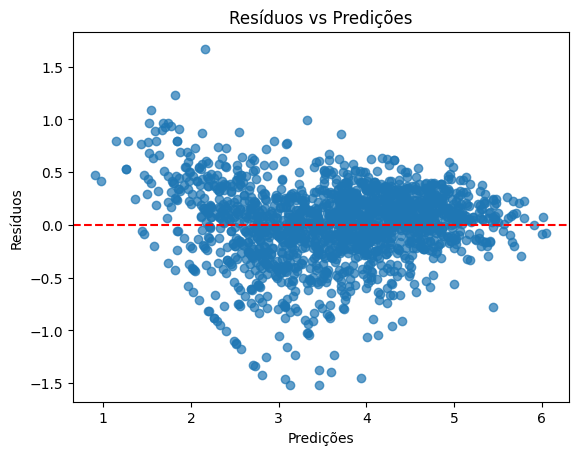

In [28]:
residuals_multi_lr = y_val_log - y_pred_multi_log

plt.scatter(y_pred_multi_log, residuals_multi_lr, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Predições')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.show()

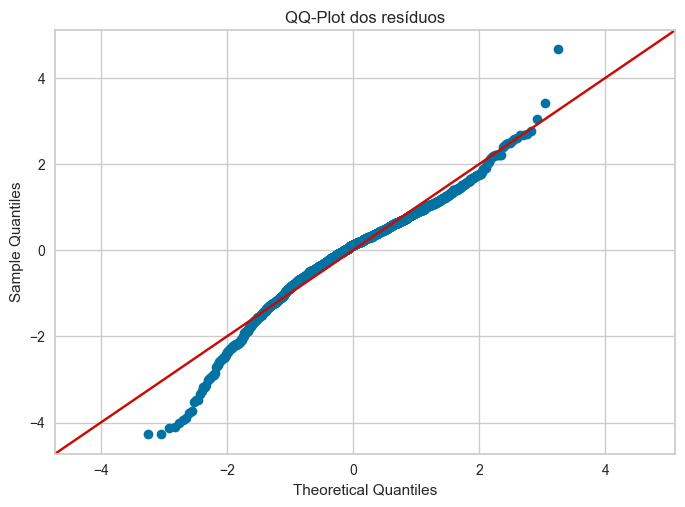

In [32]:
sm.qqplot(residuals_multi_lr, line='45', fit=True)
plt.title('QQ-Plot dos resíduos')
plt.show()

In [37]:
X_train_log_const = sm.add_constant(X_train_log)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_log.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_log_const.values, i) for i in range(len(X_train_log.columns))]

vif_data

,Feature,VIF
0,PM10,1.857047e+06
1,SO2,2.450024e+00
2,NO2,2.094018e+00
3,CO,3.160083e+00
4,O3,2.973981e+00
5,TEMP,2.909959e+00
6,PRES,9.879941e+00
7,DEWP,4.024067e+00
8,RAIN,8.002700e+00
9,WSPM,1.137184e+00


In [53]:
features_log_reduced = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', 'TEMP', 'DEWP']

X_train_log_reduced = X_train_log[features_log_reduced]
X_val_log_reduced = X_val_log[features_log_reduced]

model_reduced = LinearRegression()
model_reduced.fit(X_train_log_reduced, y_train_log)

y_pred_reduced = model_reduced.predict(X_val_log_reduced)
print(f'R2 sem as variáveis PRES E RAIN: {r2_score(y_val_log, y_pred_reduced)}')

R2 sem as variáveis PRES E RAIN: 0.8752107031187293


Preferi não retirar PM10 porque ela está com colinearidade com a variável alvo e isso faz sentido já que ambas são partículas de poluição relacionadas. Entretanto retirei as variáveis PRES e RAIN que apresentavam VIF maior que 5.

In [29]:
from pycaret.regression import *

In [30]:
reg = setup(
    data=df_2016,
    target='PM2.5',
    session_id=42,
    normalize=True,
    remove_outliers=False,
    log_experiment=False,
    ignore_features=['year', 'No', 'month', 'day', 'hour', 'station'],
    categorical_features=['wd']
)

,Description,Value
0,Session id,42
1,Target,PM2.5
2,Target type,Regression
3,Original data shape,"(8459, 18)"
4,Transformed data shape,"(8459, 27)"
5,Transformed train set shape,"(5921, 27)"
6,Transformed test set shape,"(2538, 27)"
7,Ignore features,6
8,Numeric features,10
9,Categorical features,1


In [31]:
best_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9.2033,193.4551,13.8886,0.9485,0.3144,0.2803,0.2800
et,Extra Trees Regressor,9.2660,194.4851,13.9199,0.9484,0.3067,0.2759,0.2320
rf,Random Forest Regressor,9.3705,209.4998,14.4348,0.9442,0.3070,0.2752,0.3990
gbr,Gradient Boosting Regressor,11.2520,263.3219,16.2098,0.9300,0.3692,0.3480,0.1410
dt,Decision Tree Regressor,12.1797,403.9789,20.0343,0.8923,0.4250,0.3451,0.0180
ada,AdaBoost Regressor,18.3223,508.4674,22.5369,0.8650,0.6834,0.9755,0.0760
lar,Least Angle Regression,15.6100,513.9267,22.6182,0.8645,0.5586,0.5467,0.0110
br,Bayesian Ridge,15.6054,513.9261,22.6180,0.8645,0.5588,0.5452,0.0110
ridge,Ridge Regression,15.6092,513.9250,22.6181,0.8645,0.5586,0.5464,0.0100
lr,Linear Regression,15.6096,513.8474,22.6163,0.8645,0.5595,0.5467,0.3600
